#### Importing the routine libraries

In [1]:
import sys
sys.path.insert(0, '../Lib')
from homeworkLib import EEGGraph
import pickle
import numpy as np
import pyedflib
import connectivipy as cp
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import re
import bct
import community
from community import community_louvain
from collections import defaultdict

### Loading our graphs from question 1.1

In [5]:
with open("../Pickle/EO_11.file", "rb") as f:
    EO = pickle.load(f)
with open("../Pickle/EC_11.file", "rb") as f:
    EC = pickle.load(f)


dtf_graph_EO = EO.dtf_graph
dtf_graph_EC = EC.dtf_graph

In [6]:
with open("../Pickle/all_channel_graphs.pickle", "rb") as f:
    F = pickle.load(f)
pdc_graph_EO = F[0][1]
pdc_graph_EC = F[0][3]
dtf_graph_EO = F[0][0]
dtf_graph_EC = F[0][2]

### community detection

In [7]:
#preprocessing the location files
nodes = np.arange(len(EC.labels))
labels = dict(zip(nodes, EC.labels))
for k, v in labels.items():
    labels[k] = re.sub('[^\w]',"", v)

locations = pd.read_csv("../../Data/channel_locations.txt", sep = "\s+") 
locations["label"] = locations["label"].apply(lambda x:re.sub('[^\w]',"",x))
locations = locations.set_index('label')

In [8]:
# Plot the community graph and return the cluster each node belongs to
# clusters were derived by applying the louvain algorithm
def get_community(G, locations): 
    #get the louvain partitions
    part = community.best_partition(nx.to_undirected(G))
    #saved the cluster corresponding to each node
    #those value will be used as diffent colors to distinguish the various cluster on the graph
    values = [part.get(node) for node in G.nodes()]
    nodes = np.arange(len(list(locations.index)))
    labels = dict(zip(nodes, list(locations.index)))
    loc = dict() 
    for node in nodes:
        loc[node] = (locations.loc[labels[node]][1],locations.loc[labels[node]][2])
    plt.figure(figsize=(15,10))
    nx.draw(G, node_size=1000, pos = loc,labels=labels, with_labels=True, node_color= values)
    plt.show()
    return (part)

def get_detailed_community(part, locations, title):
    res = defaultdict(list)
    for key, value in part.items():
        res[value].append(key)
    loc = list(locations.index)
    for k, val in res.items():
        for i in range(len(val)):
            val[i] = loc[val[i]]
    for k, val in res.items():
        res[k] = ' '.join(val)
    df =  pd.DataFrame(list(dict(res).items()),columns=['community','labels'])
    df.to_csv("results/"+title+".csv", index=False)
    return(df)

### Community Detection PDC Open

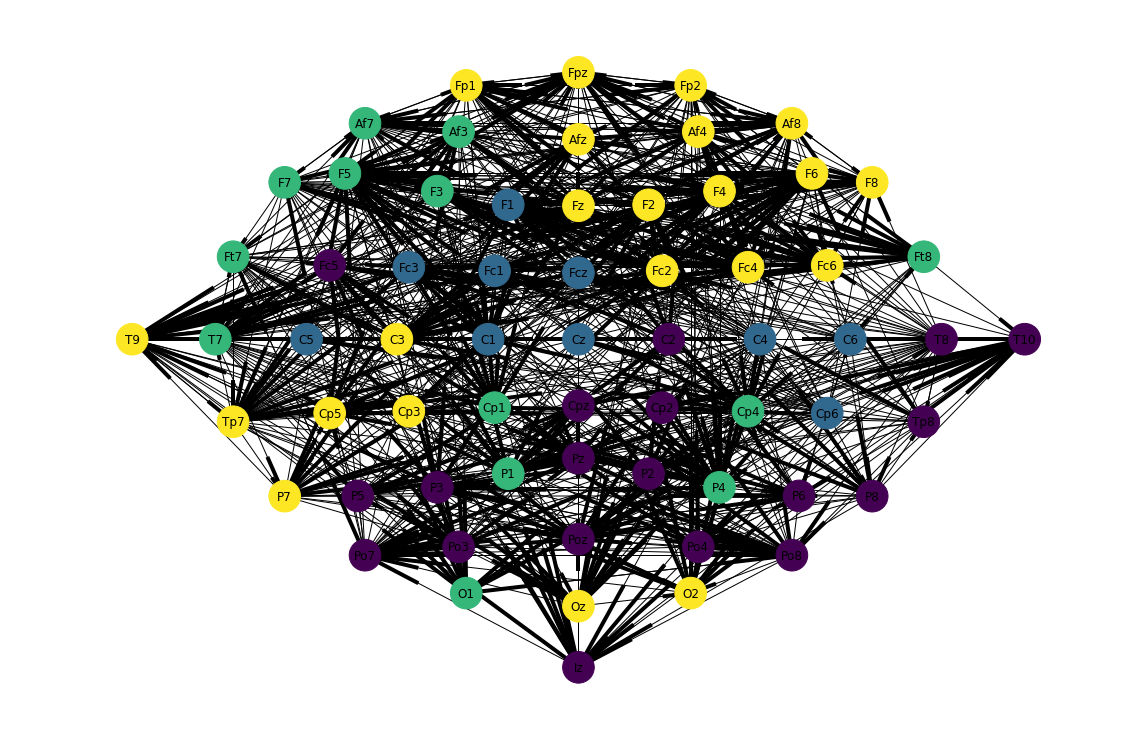

In [9]:
community_pdc_opened = get_community(pdc_graph_EO, locations)

In [10]:
get_detailed_community(community_pdc_opened, locations, '41_community_pdc_opened')

,community,labels
0,0,Fc5 Pz Iz C2 Cpz Cp2 P5 P2 P8 Po7 Po3 Po8 T8 T...
1,1,C5 C1 F1 Fc3 Fc1 Fcz Cz C4 C6 Cp6
2,2,F3 Ft8 Af3 P1 Af7 F7 O1 P4 Cp4 Cp1 F5 T7 Ft7
3,3,Tp7 P7 Fc2 Fc4 Fc6 C3 F4 Oz Afz Fz Cp3 F2 Cp5 ...


### Community Detection PDC Closed

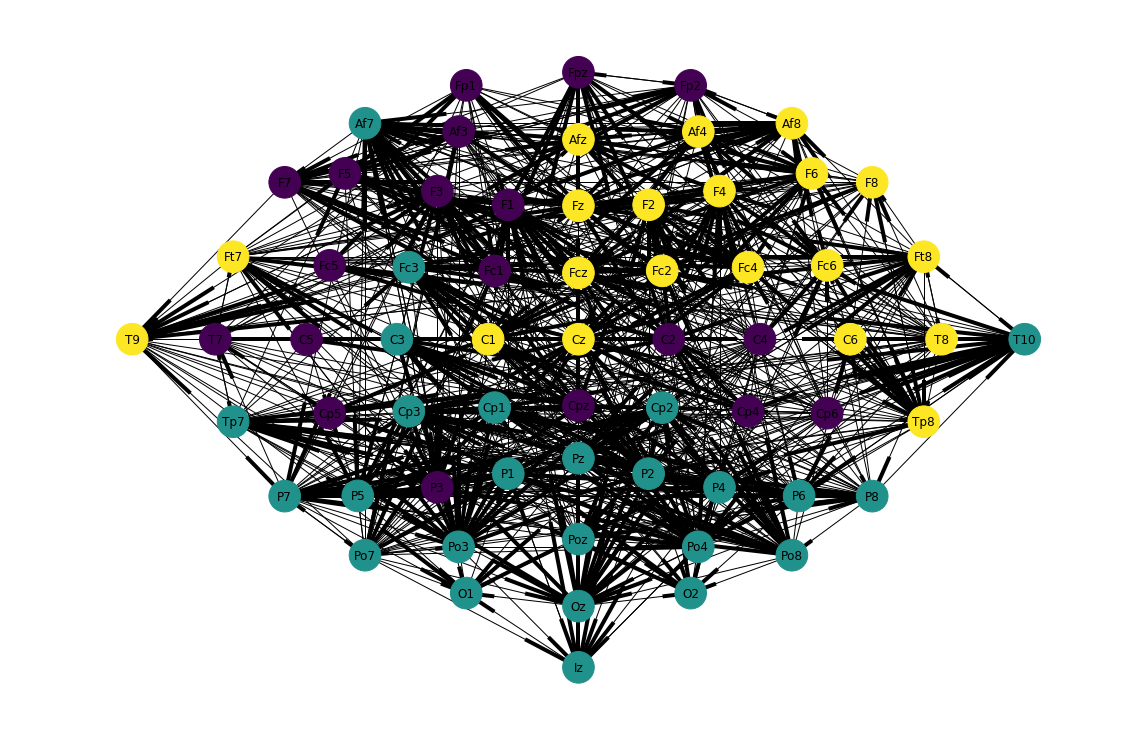

In [11]:
community_pdc_closed = get_community(pdc_graph_EC, locations)

In [12]:
get_detailed_community(community_pdc_closed, locations, '41_community_pdc_closed')

,community,labels
0,0,Fc5 C2 P3 Fc1 C5 Cp5 C4 Cp4 Fp1 Fpz Fp2 Af3 F5...
1,1,Fc3 P2 C3 Poz Cp3 Cp2 P7 P5 P1 Pz P6 Po7 Po4 O...
2,2,Fc2 Fz Fcz Fc4 Fc6 Ft8 F6 C1 Cz C6 Afz Af4 F8 ...


### Community Detection DTF Open

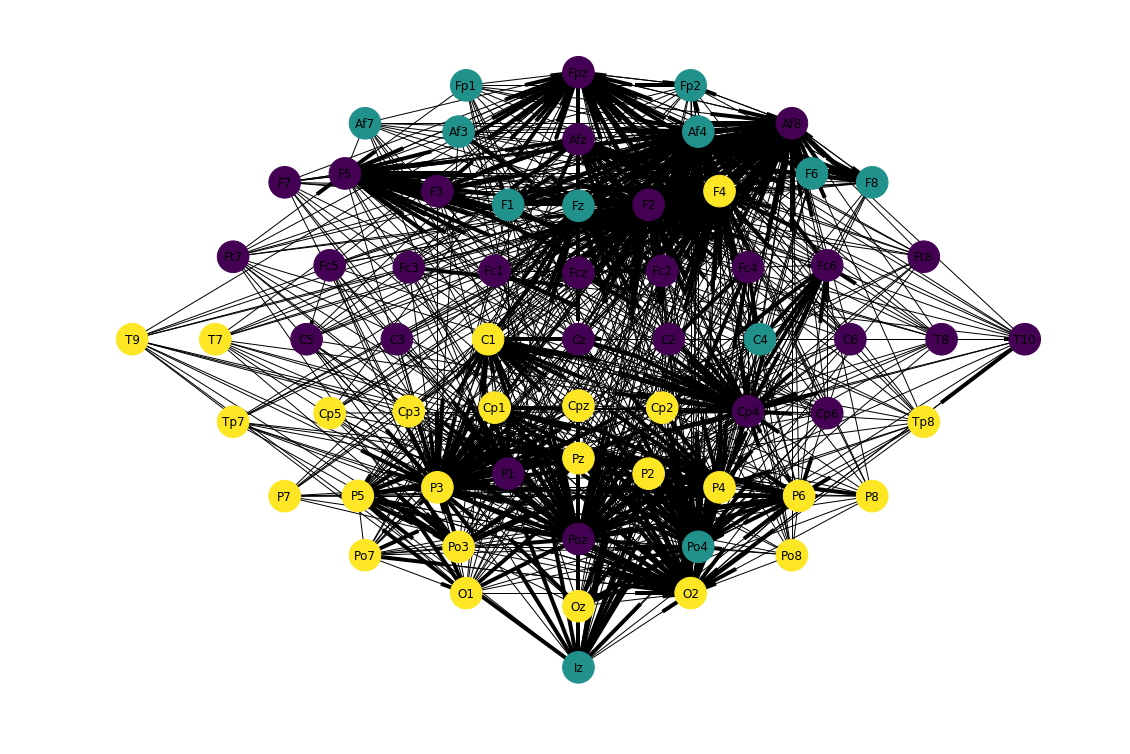

In [13]:
community_dtf_opened = get_community(dtf_graph_EO, locations)

In [14]:
get_detailed_community(community_dtf_opened, locations, '41_community_dtf_opened')

,community,labels
0,0,Fc5 C5 Cp4 Fpz Af8 F2 P1 Poz Fc3 Afz Fc1 Fc2 F...
1,1,Af4 Iz Po4 Fz C4 Af3 F1 Fp1 Fp2 F8 Af7 F6
2,2,F4 P3 O1 O2 P4 Po3 Oz C1 Cp2 P5 Pz P6 Cp5 Cp3 ...


### Community Detection DTF Closed

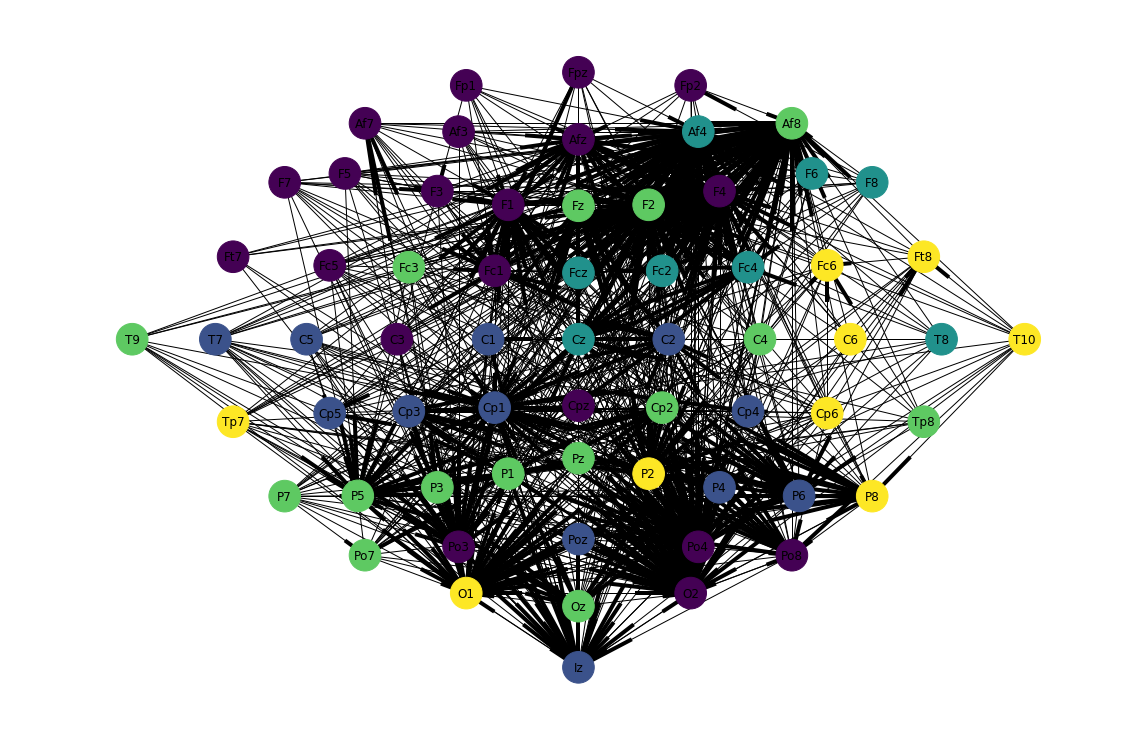

In [15]:
community_dtf_closed = get_community(dtf_graph_EC, locations)

In [16]:
get_detailed_community(community_dtf_closed, locations, '41_community_dtf_closed')

,community,labels
0,0,Fc5 Fc1 Afz F4 Po3 Po4 Po8 O2 C3 F1 Af7 Cpz Fp...
1,1,C2 P6 Iz Cp1 C5 Cp5 C1 Cp3 Cp4 P4 Poz T7
2,2,Af4 Fc2 Fc4 Fcz Cz F6 F8 T8
3,3,Af8 Fz F2 P5 P3 Fc3 Oz C4 P1 Po7 Cp2 T9 Tp8 P7 Pz
4,4,P8 O1 P2 Fc6 C6 Ft8 Cp6 T10 Tp7
